Visualisation File for Biomed - Sante Group
by Simon Rouff and Guy-Vianney Krakowiak

Definition des directories, et des bibliotheques a importer

In [2]:
model_dir = 'my_code/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
datadir = 'public_data'
dataname = 'Opioids'
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname) 
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading public_data/Opioids_train from AutoML format


IOError: File public_data/Opioids_feat.name does not exist

Visualisation des repartitions de quelques features

In [ ]:
def plot_dist(data, feat, title):
    g = plt.figure()
    sns.countplot(x=feat, data= data, order = data[feat].value_counts().index,palette="Greens_d")
    plt.xticks(rotation=85, fontsize = 8)
    plt.title(title)
    plt.show()
    
plot_dist(data, "State", "State repartition")
plot_dist(data, "Specialty", "Specialty repartition")
plot_dist(data, "Gender", "Gender repartition")
plot_dist(data, "Target", "Target class repartition")


Correlation matrix

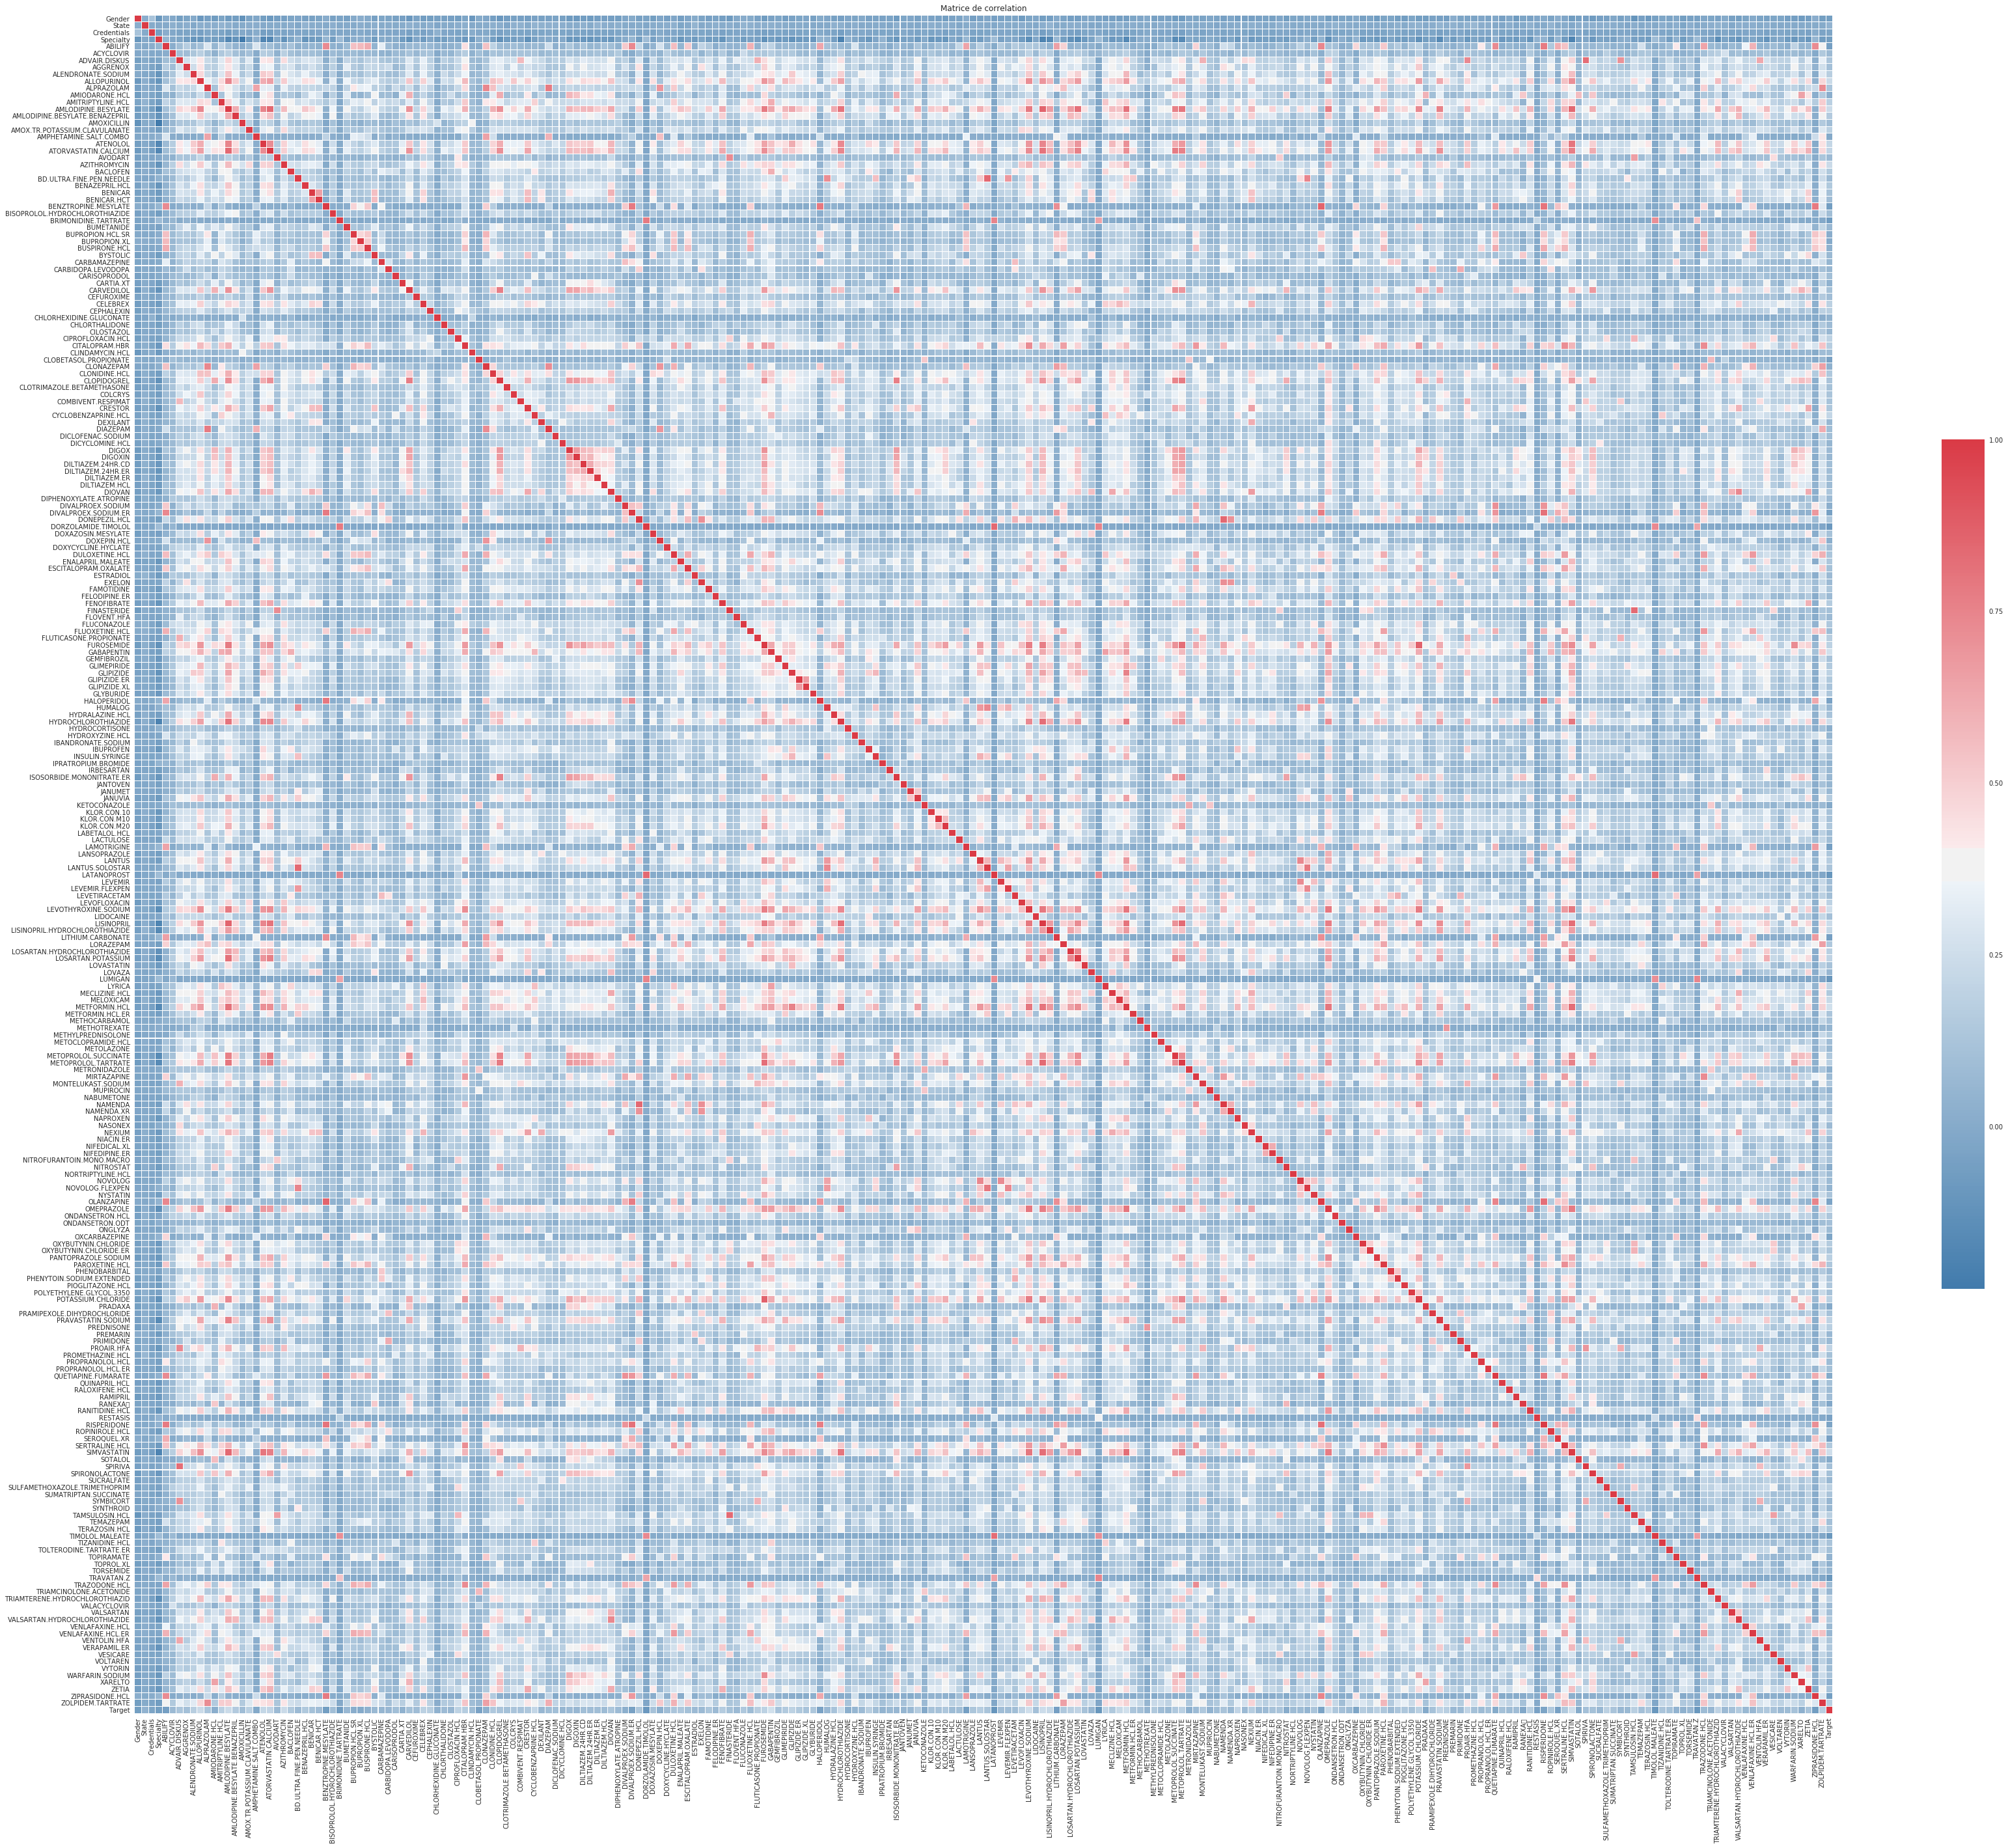

In [19]:
l = list(data)
f, ax = plt.subplots(figsize=(60, 48))

plt.title('Matrice de correlation')
corr = data.corr()

plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(243, 10, as_cmap=True),
            square=True, ax=ax, linewidths=.05, cbar_kws={"shrink": .5})

In [63]:
from myClassifier import model
from sklearn.ensemble import RandomForestClassifier

#Fait appel au constructeur model de la classe Classifier, ecrit par l'equipe Classifieur
Classifier = model()
XTrain_data = D.data['X_train']
YTrain_data = D.data['Y_train']
fit = Classifier.fit(XTrain_data, YTrain_data)
need_print_fit = 0
if need_print_fit == 1:
     print (fit)
        
YTrainPredict = Classifier.predict_proba(D.data['X_train'])
YValidPredict = Classifier.predict_proba(D.data['X_valid'])
YTestPredict = Classifier.predict_proba(D.data['X_test'])

from my_metric import auc_metric_
    
classifieurAuc = auc_metric_(YTrain_data, YTrainPredict)
print "\n"
print "Score du classifieur: "
print classifieurAuc
print "\n"
    
from sklearn.model_selection import cross_val_score
    
print "Cross Validation for Random Forrest Classifier: "
clf = RandomForestClassifier(n_estimators = 100, max_features = "log2", bootstrap = False)
crossval = cross_val_score(clf, XTrain_data, YTrain_data, cv = 10, scoring = 'roc_auc') #Calcule de la cross validation, 3 fois
print crossval #Affichage des 3 cross validations
print("Precision: %0.4f (+/- %0.04f)" % (crossval.mean(), crossval.std() * 2)) #Affichage de la moyenne des 3 CV +la précision
print "\n"




Score du classifieur: 
0.999986182732


Cross Validation for Random Forrest Classifier: 
[ 0.83744171  0.83344437  0.82744837  0.84210526  0.83533333  0.83
  0.83589059  0.81921281  0.8245497   0.81187458]
Precision: 0.8297 (+/- 0.0174)




Matrice de confusion

Matrice de confusion: 
[[6174    2]
 [  25 8799]]
[[6174    2]
 [  25 8799]]


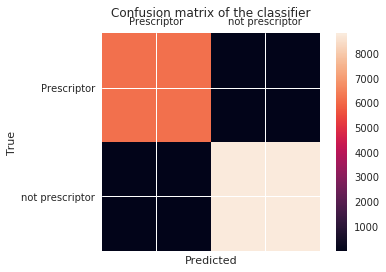

In [62]:
from sklearn.metrics import confusion_matrix
    
print "Matrice de confusion: "
CM = confusion_matrix(YTrain_data, Classifier.predict(D.data['X_train']))
print(CM)

labels = ['Prescriptor', 'not prescriptor']
print(CM)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(CM)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
clf.fit(XTrain_data, YTrain_data)
Y_valid = clf.predict_proba(D.data['X_valid'])
Y_test = clf.predict_proba(D.data['X_test'])

Variance des donnees et les 10 features les plus importantes

16195.8448343
128


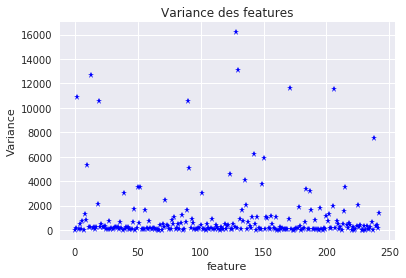

Données avec + de variance: LEVOTHYROXINE.SODIUM
Donnée avec - de variance: Gender


In [38]:
var_features = np.var(XTrain_data, axis=0)
print (max(var_features))
print np.argmax(var_features)
import matplotlib.pylab as plt

plt.plot(var_features, 'b*')
plt.ylabel("Variance")
plt.xlabel("feature")
plt.title("Variance des features")
plt.show()

header = list(data)
print "Données avec + de variance: " + header[np.argmax(var_features)]
print "Donnée avec - de variance: " + header[np.argmin(var_features)]


Lecture des feautures les plus importants

Feature ranking:
1. feature 1 (0.064045)
2. feature 3 (0.060261)
3. feature 2 (0.038668)
4. feature 15 (0.036189)
5. feature 128 (0.022337)
6. feature 91 (0.022193)
7. feature 171 (0.021163)
8. feature 46 (0.019613)
9. feature 42 (0.017495)
10. feature 105 (0.017411)


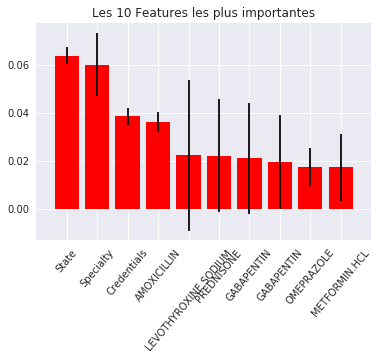

State Specialty Credentials AMOXICILLIN LEVOTHYROXINE.SODIUM PREDNISONE GABAPENTIN  OMEPRAZOLE 


In [39]:
# On se limite avec number_feature aux 10 features les plus importantes
from sklearn.ensemble import RandomForestClassifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
number_features = 10
indices = np.argsort(importances)[::-1][:number_features]



# Affichage des indice et du niveau de correlation des features les plus importants
print("Feature ranking:")
l = list(data)
for f in range(number_features):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Affichage dans un tableau a batons. Les segments noirs representent la variance.
plt.figure()
plt.title("Les 10 Features les plus importantes")
plt.bar(range(number_features), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(number_features), [l[1], l[3],l[2],l[15],l[128],l[188],l[91],l[91],l[171],l[142],l[46]], rotation = 50)
plt.xlim([-1, number_features])
plt.show()

print l[1] + ' '+l[3]+' ' + l[2] +' '+ l[15]+' ' + l[128] + ' ' + l[188] + ' '+ l[91] + '  ' + l[171]+ ' '

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ylen = len(YTrain_data) 
# Les *GNB ou *MLP servent pour tracer les courbes ROC de ces algorithmes.
fprGNB = dict()
tprGNB = dict()
fprMLP = dict()
tprMLP = dict()
# Comme pour Random Forest Classifier, on fait passer le dictionnaires de GNB et MLP par fit et predict de la classe CLassifier
GNB = GaussianNB()
fitGNB = GNB.fit(XTrain_data, YTrain_data)
YTrainPredictGNB = GNB.predict(D.data['X_train'])

MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
fiMtLP = MLP.fit(XTrain_data, YTrain_data)
YTrainPredictMLP = MLP.predict(D.data['X_train'])

fprGNB[ylen], tprGNB[ylen], _ = roc_curve(YTrain_data[:ylen], YTrainPredictGNB[:ylen], pos_label=0)
fprMLP[ylen], tprMLP[ylen], _ = roc_curve(YTrain_data[:ylen], YTrainPredictMLP[:ylen], pos_label=0)


ROC Curve

15000
[ 0.          0.99671351  0.99716682  0.99954669  0.99977335  1.          1.        ] [  0.00000000e+00   0.00000000e+00   3.23834197e-04   3.72409326e-03
   4.37176166e-03   5.34326425e-03   1.00000000e+00]


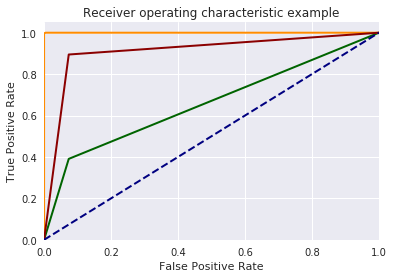

{15000: array([ 0.        ,  0.99671351,  0.99716682,  0.99954669,  0.99977335,
        1.        ,  1.        ])}


In [59]:
from sklearn.metrics import roc_curve, auc
ylen = len(YTrain_data) 
print len(YTrain_data)
fpr = dict()
tpr = dict()
#J'utilise ici les tableau des True/False positive rate et je trace leurs courbes ROC
fpr[ylen], tpr[ylen], _ = roc_curve(YTrain_data[:ylen], YTrainPredict[:ylen], pos_label=0)
print fpr[ylen], tpr[ylen]
lw = 2
plt.plot(tpr[ylen], fpr[ylen], color='darkorange', lw = lw)
plt.plot(tprGNB[ylen], fprGNB[ylen], color='darkgreen', lw = lw)
plt.plot(tprGNB[ylen], fprMLP[ylen], color='darkred', lw = lw)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print fpr